## Is there a relation between nucleic acid conformation and stacking with the protein?
- Which features of the nucleic acid conformation?
- How do we define stacking?

In [13]:
import numpy as np

**Select PDB**

In [1]:
pdb_code = "1B7F"
na_chain = "P"
protein_chain = "A"
na_resid = 5
protein_resid = 256

**Visualize PDB**

In [2]:
import nglview
widget = nglview.NGLWidget()
widget.add_component("rcsb://" + pdb_code)
selection='({0} and :{1}) or ({2} and :{3})'.format(na_resid, na_chain, protein_resid, protein_chain)
widget.add_representation('ball+stick', selection=selection, color='blue')
widget.center(selection)
widget

NGLWidget()

**Download PDB**

In [3]:
import urllib
pdb_data = urllib.request.urlopen("https://files.rcsb.org/download/{}.pdb".format(pdb_code)).read().decode()

**Execute X3DNA-DSSR**

In [4]:
import tempfile
import subprocess
import json
import os
with tempfile.NamedTemporaryFile(mode="w") as tempfile_pdb:
    tempfile_pdb.write(pdb_data)
    with tempfile.NamedTemporaryFile(mode="r") as tempfile_result:
        cwd = os.getcwd()
        try:
            os.chdir(tempfile.gettempdir())
            subp = subprocess.run(
                "x3dna-dssr -i={0} --json -o={1}".format(tempfile_pdb.name, tempfile_result.name),
                shell=True,
                stderr=subprocess.PIPE
            )
        finally:
            os.chdir(cwd)
        print(subp.stderr.decode())
        assert subp.returncode == 0        
        x3dna_analysis_data = tempfile_result.read()        
        x3dna_analysis = json.loads(x3dna_analysis_data)

[i] JSON output should end with the .json extension

Processing file '/tmp/tmpc53vx11x'
    total number of nucleotides: 24
    total number of amino acids: 334
    total number of base pairs: 2
    total number of atom-base capping interactions: 2
    total number of splayed-apart dinucleotides: 12
                        consolidated into units: 8
    total number of non-loop single-stranded segments: 2

Time used: 00:00:00:00



**Select chain and show X3DNA results**

In [5]:
x3dna_nucleotides = [nt for nt in x3dna_analysis["nts"] if nt["chain_name"] == na_chain]
x3dna_nucleotides[0]

{'index': 1,
 'index_chain': 1,
 'chain_name': 'P',
 'nt_resnum': 1,
 'nt_name': 'G',
 'nt_code': 'G',
 'nt_id': 'P.G1',
 'nt_type': 'RNA',
 'dbn': '.',
 'summary': "syn,~C2'-endo,non-stack,non-pair-contact,ss-non-loop,splayed-apart",
 'alpha': None,
 'beta': -92.219,
 'gamma': -161.658,
 'delta': 127.686,
 'epsilon': -167.738,
 'zeta': 70.091,
 'epsilon_zeta': 122.17,
 'bb_type': '--',
 'chi': 37.927,
 'glyco_bond': 'syn',
 'C5prime_xyz': [-5.973, 4.829, 0.272],
 'P_xyz': [-6.118, 3.551, 2.579],
 'form': '.',
 'ssZp': -2.512,
 'Dp': 2.834,
 'splay_angle': 104.33,
 'splay_distance': 15.063,
 'splay_ratio': 0.79,
 'eta': None,
 'theta': -37.5,
 'eta_prime': None,
 'theta_prime': -15.289,
 'eta_base': None,
 'theta_base': -8.995,
 'v0': -39.548,
 'v1': 41.741,
 'v2': -27.038,
 'v3': 4.29,
 'v4': 21.27,
 'amplitude': 41.84,
 'phase_angle': 130.258,
 'puckering': "C1'-exo",
 'sugar_class': "~C2'-endo",
 'bin': 'inc',
 'cluster': '__',
 'suiteness': 0.0,
 'filter_rmsd': 0.014,
 'frame': {'r

In [10]:
import pandas as pd
df_x3dna = pd.DataFrame(x3dna_nucleotides)
df_x3dna

,C5prime_xyz,Dp,P_xyz,alpha,amplitude,bb_type,beta,bin,chain_name,chi,...,summary,theta,theta_base,theta_prime,v0,v1,v2,v3,v4,zeta
0,"[-5.973, 4.829, 0.272]",2.834,"[-6.118, 3.551, 2.579]",NaN,41.840,--,-92.219,inc,P,37.927,...,"syn,~C2'-endo,non-stack,non-pair-contact,ss-no...",-37.500,-8.995,-15.289,-39.548,41.741,-27.038,4.290,21.270,70.091
1,"[-2.116, 8.665, -0.22]",1.268,"[0.094, 9.193, 1.116]",-108.087,33.763,--,-177.928,22p,P,-132.195,...,"anti,~C2'-endo,non-stack,non-pair-contact,ss-n...",82.597,68.442,69.787,-15.202,30.854,-33.431,25.375,-6.128,59.436
2,"[-3.73, 8.225, -1.777]",1.862,"[-2.633, 10.562, -1.188]",-137.293,40.514,--,-132.284,22p,P,-106.546,...,"turn,anti,~C2'-endo,non-pair-contact,ss-non-lo...",-83.825,-56.384,-81.681,-38.586,40.208,-26.082,4.120,20.740,-77.482
3,"[-2.292, 8.626, -0.867]",1.582,"[-0.282, 9.847, 0.244]",-75.588,34.945,--,-171.481,22p,P,-123.797,...,"anti,~C2'-endo,non-pair-contact,ss-non-loop,ph...",122.436,139.702,122.902,-23.945,35.317,-31.969,18.741,2.913,125.381
4,"[-2.242, 8.656, -0.828]",1.176,"[0.306, 9.337, -0.898]",-92.225,28.247,--,168.414,22p,P,-124.134,...,"anti,~C2'-endo,non-pair-contact,ss-non-loop,ca...",-46.913,-135.615,-106.931,-19.235,28.387,-25.870,15.198,2.480,-101.081
5,"[-2.743, 8.554, -1.596]",1.325,"[-0.552, 10.049, -1.394]",113.213,27.209,--,-149.409,trig,P,-115.632,...,"turn,anti,~C2'-endo,non-pair-contact,ss-non-lo...",-52.597,-127.814,-89.251,-26.869,25.602,-14.793,-0.760,17.053,-78.885
6,"[-0.743, 8.165, 0.718]",4.633,"[0.768, 10.103, -0.045]",-46.035,27.027,--,172.227,trig,P,-158.516,...,"anti,~C3'-endo,non-pair-contact,ss-non-loop,sp...",-154.539,-115.913,-143.831,17.627,-26.286,25.113,-14.974,-1.802,-77.306
7,"[-1.982, 8.9, -0.211]",4.348,"[0.443, 9.831, -0.171]",-43.995,31.277,--,161.969,33p,P,-144.877,...,"anti,~C3'-endo,non-pair-contact,ss-non-loop,ca...",-157.953,-119.718,-163.517,-10.485,-9.399,24.697,-31.791,26.189,-140.844
8,"[-1.887, 8.697, -0.744]",2.111,"[0.65, 9.189, -0.198]",68.875,25.674,--,159.521,32p,P,-129.671,...,"anti,~C2'-endo,non-canonical,ss-non-loop,splay...",151.077,153.153,147.679,-18.116,25.446,-23.225,13.002,3.121,171.156
9,"[-2.003, 8.628, -0.201]",1.265,"[0.2, 9.093, 1.214]",-64.981,33.764,BII,164.796,22p,P,-132.577,...,"anti,~C2'-endo,BII,non-stack,non-canonical,ss-...",156.236,116.872,129.164,-13.641,30.067,-33.630,26.542,-7.922,128.465


**Parse PDB into structured Numpy array using parse_pdb.py**

In [7]:
import parse_pdb

In [8]:
parsed_pdb = parse_pdb.parse_pdb(pdb_data)
parsed_pdb[:2]

array([(1, b' ', b'OP3', b' ', b'  G', b'P', 1, b' ', 1, 43.063, 59.607, 115.478, 1., 68.76, b'    ', b'O'),
       (1, b' ', b'P', b' ', b'  G', b'P', 2, b' ', 1, 42.131, 58.379, 115.046, 1., 68.5 , b'    ', b'P')],
      dtype={'names':['model','hetero','name','altloc','resname','chain','index','icode','resid','x','y','z','occupancy','bfactor','segid','element'], 'formats':['<u2','S1','S4','S1','S3','S1','<u4','S1','<u2','<f4','<f4','<f4','<f4','<f4','S4','S2'], 'offsets':[0,2,3,7,8,11,12,16,18,20,24,28,32,36,40,44], 'itemsize':48, 'aligned':True})

In [9]:
parse_pdb.print_atom(parsed_pdb[:2])

[{'model': 1,
  'hetero': b' ',
  'name': b'OP3',
  'altloc': b' ',
  'resname': b'  G',
  'chain': b'P',
  'index': 1,
  'icode': b' ',
  'resid': 1,
  'x': 43.063,
  'y': 59.607,
  'z': 115.478,
  'occupancy': 1.0,
  'bfactor': 68.76,
  'segid': b'    ',
  'element': b'O'},
 {'model': 1,
  'hetero': b' ',
  'name': b'P',
  'altloc': b' ',
  'resname': b'  G',
  'chain': b'P',
  'index': 2,
  'icode': b' ',
  'resid': 1,
  'x': 42.131,
  'y': 58.379,
  'z': 115.046,
  'occupancy': 1.0,
  'bfactor': 68.5,
  'segid': b'    ',
  'element': b'P'}]

In [20]:
df_pdb = pd.DataFrame(parsed_pdb)
# Convert bytes to strings
for col, dtype in df_pdb.dtypes.items():
    if dtype == np.object:  # Only process byte object columns.
        df_pdb[col] = df_pdb[col].apply(lambda x: x.decode("utf-8"))
df_pdb[:10]

,model,hetero,name,altloc,resname,chain,index,icode,resid,x,y,z,occupancy,bfactor,segid,element
0,1,,OP3,,G,P,1,,1,43.063000,59.606998,115.477997,1.0,68.760002,,O
1,1,,P,,G,P,2,,1,42.131001,58.379002,115.045998,1.0,68.500000,,P
2,1,,OP1,,G,P,3,,1,40.734001,58.716999,115.407997,1.0,72.000000,,O
3,1,,OP2,,G,P,4,,1,42.750000,57.137001,115.561996,1.0,67.459999,,O
4,1,,O5',,G,P,5,,1,42.236000,58.367001,113.435997,1.0,65.599998,,O
5,1,,C5',,G,P,6,,1,41.796001,57.227001,112.693001,1.0,63.330002,,C
6,1,,C4',,G,P,7,,1,42.939999,56.250000,112.446999,1.0,61.330002,,C
7,1,,O4',,G,P,8,,1,43.192001,55.431000,113.620003,1.0,65.720001,,O
8,1,,C3',,G,P,9,,1,42.609001,55.277000,111.293999,1.0,59.939999,,C
9,1,,O3',,G,P,10,,1,43.695000,55.313000,110.344002,1.0,51.830002,,O


**Select protein and nucleic acid chain from parsed PDB**

In [25]:
protein_atoms = parsed_pdb[parsed_pdb["chain"]==protein_chain.encode()]
na_atoms = parsed_pdb[parsed_pdb["chain"]==na_chain.encode()]
len(protein_atoms), len(na_atoms)

(1365, 254)

**Define code to calculate stacking properties**

In [59]:
def calculate_stacking_properties(protein_atoms, protein_resid, na_atoms, na_resid):
    import scipy.spatial.distance
    res_protein = protein_atoms[protein_atoms["resid"]==protein_resid]    
    assert len(res_protein)
    aa = res_protein[0]["resname"].decode().strip()
    res_na = na_atoms[na_atoms["resid"]==na_resid]
    assert len(res_na)
    nuc = res_na[0]["resname"].decode().strip()[-1] # one-letter
    coor_res_protein = np.stack((res_protein["x"], res_protein["y"], res_protein["z"])).T
    coor_res_na = np.stack((res_na["x"], res_na["y"], res_na["z"])).T
    
    result = {}
    dist = scipy.spatial.distance.cdist(coor_res_protein, coor_res_na)
    result["closest_distance"] = dist.min()
    
    sidechains = {
        "PHE": ['CG', 'CD1', 'CD2', 'CE1', 'CE2', 'CZ']
    }
    sidechain_mask = np.isin(res_protein["name"], [name.encode() for name in sidechains[aa]])
    bases = {
        "U": ['C2', 'C4', 'C5', 'C6', 'N1', 'N3']
    }
    base_mask = np.isin(res_na["name"], [name.encode() for name in bases[nuc]])
    stacking_dist = dist[sidechain_mask][:,base_mask]
    result["mean_stacking_dist"] = stacking_dist.mean()
    result["std_stacking_dist"] = stacking_dist.std()
    
    return result

In [60]:
stacking_properties = calculate_stacking_properties(protein_atoms, protein_resid, na_atoms, na_resid)
stacking_properties

{'closest_distance': 3.592381988189429,
 'mean_stacking_dist': 4.116062615882038,
 'std_stacking_dist': 0.3413763846372231}

**Define code to integrate all properties**
- Stacking properties are computed using the code above
- A list of other properties is extracted from the X3DNA analysis

In [68]:
def calculate_all_properties(protein_atoms, protein_resid, na_atoms, na_resid, x3dna_nucleotides):
    stacking_properties = calculate_stacking_properties(protein_atoms, protein_resid, na_atoms, na_resid)
    x3dna_nucl = [nucl for nucl in x3dna_nucleotides if nucl["nt_resnum"] == na_resid]
    assert len(x3dna_nucl) == 1
    nucl_props = ["gamma", "delta", "chi"]
    result = {}
    for prop in nucl_props:
        result[prop] = x3dna_nucl[0][prop]
    result.update(stacking_properties)
    return result

In [69]:
all_properties = calculate_all_properties(protein_atoms, protein_resid, na_atoms, na_resid, x3dna_nucleotides)
all_properties

{'gamma': 74.872,
 'delta': 138.48,
 'chi': -124.134,
 'closest_distance': 3.592381988189429,
 'mean_stacking_dist': 4.116062615882038,
 'std_stacking_dist': 0.3413763846372231}

**Calculate properties for all residue-nucleotide pair**

Instead of using the pre-selected residue and nucleotide, iterate over all

In [70]:
all_protein_resids = np.unique(protein_atoms["resid"])
all_na_resids = np.unique(na_atoms["resid"])

In [81]:
stackings = []
for curr_na_resid in all_na_resids:    
    for curr_protein_resid in all_protein_resids:
        try:
            properties = calculate_all_properties(
                protein_atoms, curr_protein_resid, 
                na_atoms, curr_na_resid, 
                x3dna_nucleotides
            )
        except (KeyError, AssertionError):
            continue
        properties["na_resid"] = curr_na_resid
        properties["protein_resid"] = curr_protein_resid
        stackings.append(properties)

In [82]:
df_stackings = pd.DataFrame(stackings)
df_stackings

,chi,closest_distance,delta,gamma,mean_stacking_dist,na_resid,protein_resid,std_stacking_dist
0,-132.195,34.911355,152.039,55.956,41.027224,2,145,1.319148
1,-132.195,30.253203,152.039,55.956,35.168875,2,170,1.297826
2,-132.195,39.929232,152.039,55.956,45.901817,2,173,1.371221
3,-132.195,18.259735,152.039,55.956,22.154521,2,231,1.141637
4,-132.195,11.602514,152.039,55.956,17.251999,2,256,1.188375
5,-106.546,29.856863,127.160,56.685,34.373469,3,145,1.028058
6,-106.546,26.836317,127.160,56.685,30.937429,3,170,0.793023
7,-106.546,34.938578,127.160,56.685,39.302001,3,173,1.020258
8,-106.546,11.718905,127.160,56.685,14.467592,3,231,1.076994
9,-106.546,6.776143,127.160,56.685,10.642467,3,256,0.662356


**Plot a nucleotide conformation property versus a stacking property**

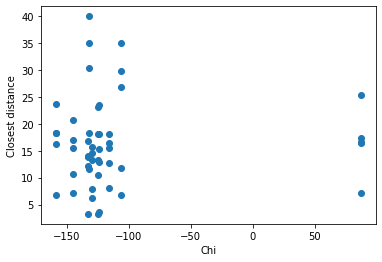

In [86]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(
    [stacking["chi"] for stacking in stackings],
    [stacking["closest_distance"] for stacking in stackings],
)
ax.set_xlabel('Chi')
ax.set_ylabel('Closest distance')
plt.show()